# SQL BOOTCAMP


https://www.udemy.com/the-complete-sql-bootcamp/

Uses: PostGreSQL and PgAdmin and a fake movie store database with movies, costs, rentals, customers

* Create a Database
* Create a Table
* Restore a Table
* Restore a Table with only schema and no data

# Cheatsheet

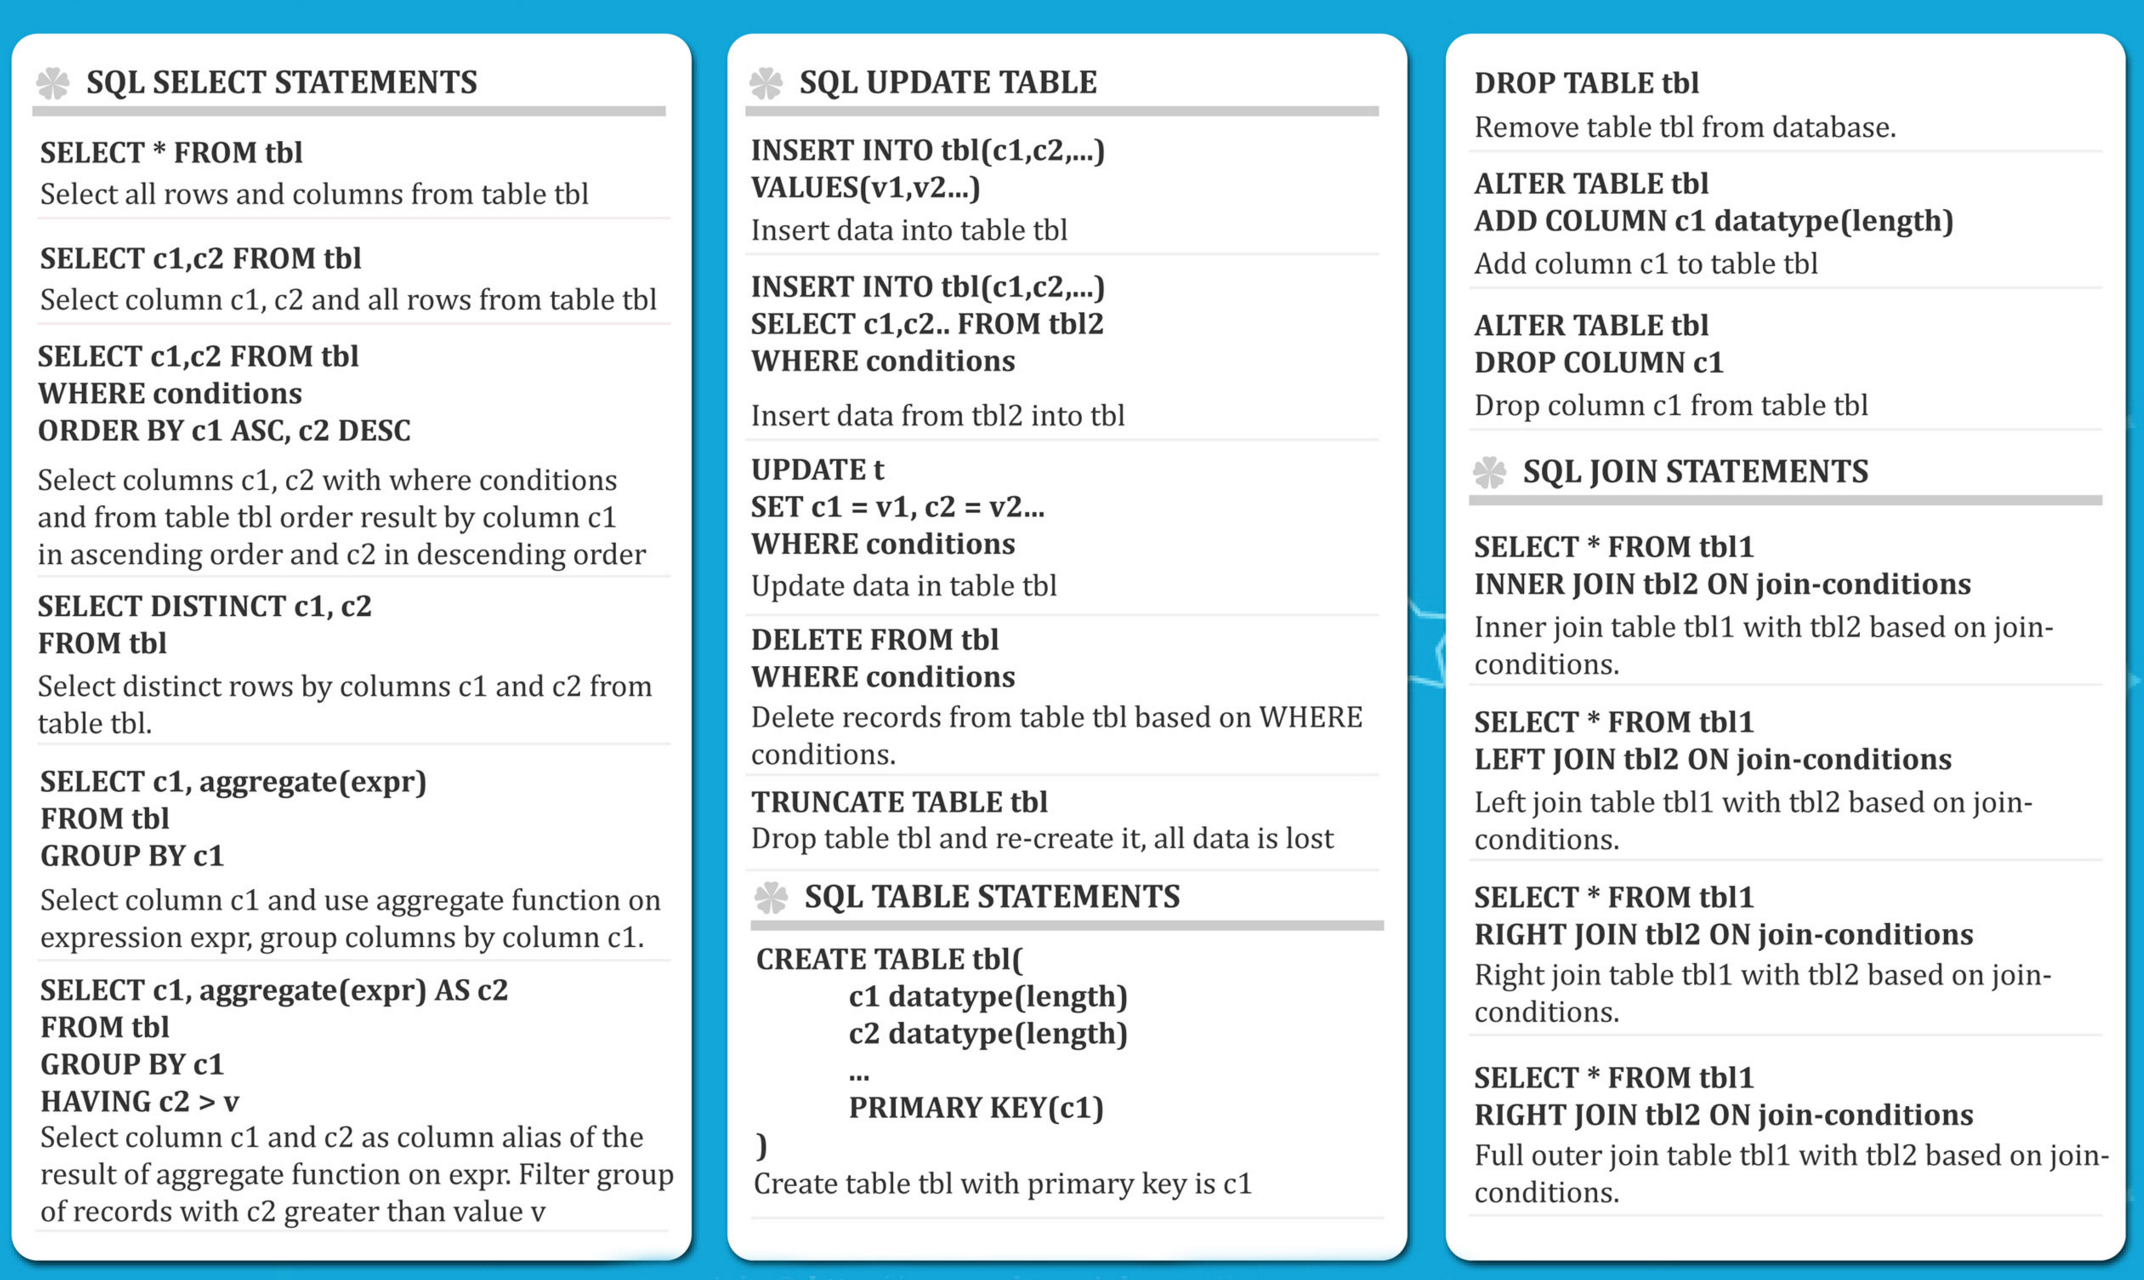


## SQL TABLE STATEMENTS

Create a Table as tbl with the primary key as Column c1:

    CREATE TABLE tbl(
    c1 datatype(length)
    c2 datatype(length)
    ...
    PRIMARY KEY (c1)
    ) 

Remove Table tbl from the database:

    DROP TABLE tbl

Add Column c1 to the Table tbl:

    ALTER TABLE tbl
    ADD COLUMN c1 datatype(length)

Drop Column c1 from Table tbl:

    ALTER TABLE tbl
    DROP COLUMN c1
    


## SQL UPDATE TABLE

Insert Data into Table tbl:

    INSERT INTO tbl(c1,c2,c3...c4)
    VALUES(v1,v2,v3...v4)
    
Insert Data from Table 2 tbl2 into Table tbl:

    INSERT INTO tbl(c1,c2,c3...c4)
    SELECT c1,c2,c3...c4 FROM tbl2
    WHERE conditions

Update Data in Table tbl:

    UPDATE t
    SET c1 = v1, c2 = v2,...
    WHERE conditions

Delete records from Table tbl based on WHERE conditions:

    DELETE FROM tbl
    WHERE conditions
    
Drop/Delete Table and Recreate it, all data is lost:

    TRUNCATE TABLE tbl
    



## SQL SELECT STATEMENTS

Select all Rows and Columns from the Table tbl:

    SELECT * from tbl

Select all Columns c1,c2 and all Rows from Table tbl:

    SELECT c1,c2 FROM tbl
    
Select Columns c1,c2 with WHERE conditions to choose individual rows and FROM Table tbl and Order results by Column c1 in Ascending Order and c2 in Descending Order:

    SELECT c1,c2 FROM tbl
    WHERE  conditions
    ORDER BY c1 ASC, c2, DESC

Select Distinct Rows by Column c1 and c2 in Table tbl:

    SELECT DISTINCT c1,c2
    FROM tbl

Select Column c1 and use Aggregate function on Expression expr then Group By columns by Column c1:

    SELECT c1, aggregate(expr)
    FROM tbl
    GROUP BY c1
    
Select Column c1 and c2 AS Column Alias of the result of the Aggregate function on Expression expr then Filter the Group BY of records with c2 HAVING a greater than Value v:
    
    SELECT c1, aggregate(expr) AS c2
    FROM tbl
    GROUP BY c1
    HAVING c2 > v


## SQL JOIN STATEMENTS

Inner Join Table tbl1 with Table tbl2 based ON some join-conditions:
    
    SELECT * FROM tbl1
    INNER JOIN tbl2 ON join-conditions
    
Left Join a Table tbl1 with Table tbl2 based on some join-conditions:

    SELECT * FROM tbl1
    LEFT JOIN tbl2 ON join-conditions
    
Right Join Table tbl1 with Table tbl2 based on some join-conditions:

    SELECT * FROM tbl1
    RIGHT JOIN tbl2 ON join-conditions

Full Outer Join on Table tbl1 with Table tbl2 based on some join-conditions:

    Select * FROM tbl1
    FULL OUTER JOIN tbl2 ON join-conditions

#### Basic Example of SELECT and WHERE:

To get the address from a customer when we only know the phone number:

    SELECT address_row FROM customers_table
    WHERE phone_number_column = 555-1212;

#### Count 

Consided an aggregate function. Returns the number of input rows that match a certain condition from the select statement. Basically counting where the condition was true. DOES NOT consider NULL values in the rows as it counts through them. Used a lot in group by clauses.

    SELECT COUNT from(*) tbl; 

or 
    
    SELECT COUNT(column_name) FROM tbl;

or

    SELECT COUNT(DISTINCT column_name) 
    FROM tbl; 

Examples:

Return the total count of customers that paid something.

    SELECT COUNT(DISTINCT amounts_paid) FROM payments;

#### Limit

Goes at the end of a query. Is useful when we want to have all the Columns but don't want all the rows returned. It limits the ROWS.
    
    # select all the customers then order them by age and give me only the top 5 oldest customers in ascending 
    SELECT * FROM customers
    ORDER BY age_column ASC
    LIMIT 5; 
    
Or use limit when we want to just see the columns but need to call the SELECT \*, we can then limit 1 so the things returned is small to not overwhelm the database




#### Order By

use order by clause in conjunction with the select statement on columns as it allows you to instead of gettting the rows back in the order they were inserted into the table, you can get them back in Ascending or Descending order. Use comma to separate multiple columns. Default, blank Order by uses ASC.  

    # syntax
    SELECT column1,column2
    FROM table_name
    ORDER BY column2 ASC/DESC;

    

#### get customers by first name and last name ordered by first name in asc order
    SELECT first_name,last_name
    FROM customers
    ORDER BY first_name ASC;
    
Calling an order on the results of the first query, aka calling a second order by choice at the end (use a comma)
return the customers ordered by first name, then order them by last name.
 ---> essentially what happens is that we order by first name, BUT anywhere there is multiple first names starting with the same letter we then start the ordering of the people by last names (in this case by descending order)

    SELECT first_name,last_name FROM customers
    ORDER BY first_name ASC,
    last_name DESC;
    output >>   Keith Rico
                Kelly Torres
                Kelly Knott
                Ken Goodwin

PostGreSQL allows you to ORDER BY a column that you may not have even selected by. Results won't show the order by column in this case. Perhaps you want the customers name returned, but order by the amount a customer paid, then have that ordered by city. 

    SELECT first_name FROM customers
    ORDER BY last_name;
    
Examples:

Get customer ID's for the top 10 highest payment amounts:

    SELECT customer_id,amount FROM payment_table
    ORDER BY amounts DESC
    LIMIT 10;
    
Get the title of the movies with the film id's 1-5:

    SELECT titles,release_year,film_id FROM movies_table
    ORDER BY film_id 
    LIMIT 5;
    

### BETWEEN, IN, LIKE

**BETWEEN**

use between operator to match a value against a range of values. Can think of it like a WHere statement. it is really a >= and <= statement. To rewrite the BETWEEN NOT statement you can write it as, value < low OR value > high;

    value BETWEEN LOW and HIGH;
    payment BETWEEN 2.99 and 3.99;
    Value BETEEN NOT low and high;
    payment BETWEEN NOT 2.99 and 3.99;
    
    SELECT customer_id,amount FROM payment_table
    WHERE amount BETWEEN 7.99 and 9.99;
    # or 
    SELECT customer_id,amount FROM payment_table
    WHERE amount BETWEEN NOT 8.99 and 9.99;
    
Check a value against a range of dates:

    SELECT amount,payment_date FROM customer_table
    WHERE payment_date BETWEEN '2007-02-07' and '2007-02-15'

**IN**

use the IN operator with the where clause to check is a value matches any value in a list of values. 

    value IN(value1,value2,...)
    
Thre expression returns true if the value matches any value in the list. The list of values is not limited to a list of numbers or strings BUT also a result set of a select query statement. aka the select value within the value IN statement is considered a SUBQUERY

    value IN(SELECT value FROM tbl_name);
    
Value in can accept the NOT operator to adjust the value IN statement (use: value NOT IN() from table_name), just like between. This is very similar to writing for loops. such as WHERE cunstomer_id IN (7,9,13) is the same thing as Where customer_id = 7 OR customer_id = 13 OR customer_id = 10 :


Examples:

to see the table columns and datatypes:

    SELECT * FROM rental_table
    LIMIT 1;
    
What if we want to see rental information only from one and two

    SELECT customer_id,rental_id,return_date
    FROM rental_table
    WHERE customer_id IN(1,2)
    ORDER BY return_date DESC;
    
What if we want to see rental information from everyone except one and two

    SELECT customer_id,rental_id,return_date
    FROM rental_table
    WHERE customer_id NOT IN(1,2)
    ORDER BY return_date DESC;

Example:
    
peek at the columns and data types in them

    SELECT * FROM rental_payments
    LIMIT 1;
    
Look for the all the renters that purchased things for 7.99 and 8.99
 
    SELECT * FROM rental_payments
    WHERE amounts IN(7.99,8.99)

    
**LIKE Statement**

Used when looking for somethign similar, say JEN is all we remember from the name JENNY. While we can order the first names alphabetically then look manually for the JEN parts. Or we can use LIKE statements. LIKE uses pattern matching. 

* Note they are creates as a string with ''
* % - for pattern matching any sequence of characters
* _ - for pattern mathcing any single chatacter
* We can add the pattern mathching in front as well ('%nny' should return Jenny as well as Benny)
* pattern matching can happen in the middle too ('J%y' should return only Jenny)
* Can use multiple pattern matching (%enn% should return Jennifer Benny Jenny)

* Like by itself is case sensitive
* To avoid case sensitive situations add an 'I' to the LIKE statement = ILIKE

Example:
    
    SELECT first_name,last_name
    FROM customers_table
    WHERE first_name LIKE 'Jen%';
    
NOT like examples:

    SELECT first_name,last_name
    FROM customers_table
    WHERE first_name NOT LIKE 'Jen%';
    >> Benny, 
    
_ examples:

    SELECT first_name,last_name
    FROM customers_table
    WHERE first_name NOT LIKE '_her%';
    >> Cheryl, Theresa, Sherry    

ILIKE example:

    SELECT first_name,last_name
    FROM customers_table
    WHERE first_name LIKE 'Bar%';
    >> Barbera
    
    SELECT first_name,last_name
    FROM customers_table
    WHERE first_name LIKE 'BaR%';
    >> NOTHING RETURNED DUE TO CASE SENSITIVE
    
    SELECT first_name,last_name
    FROM customers_table
    WHERE first_name ILIKE 'BaR%';
    >> Barbera

### Sample Problems:

How many payment transactions were greater than 5.00?

    SELECT COUNT(amount) FROM payment
    WHERE amount > 5;
    


How many actors have a first name starting with P?

    

    SELECT COUNT(*) from actors_table
    WHERE first_names LIKE 'P%';
    


How many unique districts are our customers from?

   

    SELECT COUNT(DISTINCT(customers_districts)) 
    FROM address_table;
    


Retrieve those customers?

   

    SELECT distinct(customers_districts)
    FROM address_table;
    


How many films have a rating of R and a replacement cost between 5 and 15?

    

    SELECT COUNT(*) FROM film_table
    WHERE rating_column = 'R'
    AND replacement_cost BETWEEN 5 AND 15;



How many films have a the word TRUMAN somewhere in the title?

    

    SELECT COUNT(*) FROM film_table
    WHERE film_titles ILIKE '%Truman%':
    

# Aggregate function


## MIN, MAX, AVG, SUM, COUNT, ROUND

* Used often in group by


* Takes many rows and aggregates them into one single value

#### AVG

    SELECT AVG(amounts_column) FROM payments_table";

#### ROUND    

* Round is a function
* add a tuple with the second number as the number of decimal places

Round the return results:
  
    SELECT ROUND(AVG(amounts_column), 2) FROM payments_table;
    

#### MIN

    SELECT MIN(amounts_column) FROM payments_table;
    >> 0.00
    SELECT amount_column FROM payments_table
    ORDER BY amount ASC;
    >> lots
    SELECT count(amount_column) FROM payments_table;
    WHERE amount=0.00;
    >>24

#### MAX
    
    SELECT MAX(amount_column) FROM payments_table;
    >>11.99

#### SUM

    SELECT SUM(amounts_column) FROM payments_table;
    >> 61312.04

# GROUP BY

* One of the most useful features of SQL

* The GROUP BY clause/function divides the rows that are retured from the SELECT statement into groups.

* For EACH group you can apply aggregate functions! (such as calculate a sum, or total item numbers in the group)

#### GROUP BY SYNTAX

SELECT column_1, aggregate_function(column_2)
FROM table_name
GROUP BY column_1;

* Calling an aggregate function is not always necessary, but this is what makes group by powerful

### GROUP BY EXAMPLES

Lets take a look at the table details:

    SELECT * FROM payment_table
    LIMIT 10;

    >> payment_id (int), customer_id (smallint), staff_id (smallint), rental_id (integer), amount (numeric(5,2)), payment_date (timestamp without time zone)
    
* Customers are repeated throughout as they come back to rent more

Using GROUP BY without an aggregate function first:

    SELECT customer_id FROM payment_table
    GROUP BY customer_id;
    
* Groups all the customer by their id, similar to DISTINCT bc it only returns the distinct customer_id as a single unit (599 rows versus 14K rows)

Using Group by:

    SELECT customer_id, SUM(amount_column) 
    FROM payment_table
    GROUP BY customer_id;

* Returns 2 columns. customer_id AND it creates a new column.
* The SQL statement tell is to pull the customers and then group by that customer for one row per customer and then to sum the totals of their purchases. 
* The new row is a SUM COLUMN
* It is the total sum for each customer that purchased things from the store.

Lets figure out who is the customer that shops the most with us?

    SELECT customer_id, SUM(amount) 
    FROM payment_table
    GROUP BY customer_id
    ORDER BY SUM(amount_column) DESC;

Returns all the customers with each of their customer id's in one row with the sum of all their purchases added into a new column, and then ordered from the highest number of sum. 

Which employee process the most orders?

Lets see the column names again:

    SELECT * FROM payments_table
    LIMIT 1;
    

We find we have two staff members as int 1 and int 2 in the staff_id column for each purchase.

    SELECT staff_id, COUNT(payment_id)
    FROM payments_table
    GROUP BY staff_id DESC;

* We get back 2 columns with 2 rows, staff_id and the new aggregate COUNT for each staff member of what they processed.

#### Group By Example FILMS


Peek at the table:
    
    SELECT * FROM film_table
    LIMIT 1;

    >> returns a ton of rows with movie details, ratings, titles, desc, year released, actors, etc

take all films that are in rating and group them by their rating then aggregate them by how many their are for each rating group. R, NC-17, pg, pg-13, G

    SELECT rating, COUNT(rating) FROM film
    GROUP BY rating;
    
    >> returns 2 columns, with 5 rows, one for each rating, with the count for each rating group 



Whats the amount of time that the films are rented for? What's order of the rental durations? 

    SELECT * FROM film_table
    LIMIT 1;

We see that we have a rental duration as an int, as number of days rented

    SELECT rental_duration,COUNT(rental_duration)
    FROM film_table
    GROUP BY rental_duration DESC;
        
    >> 7 and 5 days rentals are the lowest amounts, Then 3 and 4 days, and finally 6 days is the number of days movies are rented for the most often

What's the everage rental rate for movies rented? 

Get a feel for the columns we need:
    
    SELECT rental_rate_column,film_rating_column
    FROM film_table
    LIMIT 5;
    >> shows 2 columns of 5 rows for the rental prices and the movie rating columns


    SELECT rating_column, ROUND(AVG(rental_rate_column))
    FROM film_table
    GROUP BY rental_rating;
    >> grouped ratings are averaged by rental rates with PG being the most rented, and G being the lowest from G, PG, PG-13, R, NC-17

# Real World GROUP BY examples:

We have 2 staff members that with staff IDs 1 and 2, and we want to give the staff member a bonus that handled the most payments.
* How many payments  did each staff member handle?
* How much was  the total amount processed by each staff member?

    SELECT staff_id,COUNT(amount),SUM(amount) 
    FROM payments_table 
    GROUP BY staff_id;
    >>Returns 3 columns Staff_ids, and then the generated aggregates of COUNT and SUM with only 2 rows one for each staff memeber. We can see that staff member 2 had the most ordered processed with COUNT and the SUM shows us that staff member 2 also had the most amount of money processed (which makes sense as they processsed more items).


Corporate HQ is auditing our store, they want to know the avg replacement cost of all the movies by rating?

* i.e. R rated movies have an avg replacement cost of $20.23

* There is a replacement_Cost column
* Use an aggregate function with a group by

    SELECT rating_column,ROUND(AVG(replacement_cost),2)
    FROM film_table
    Group by rating;
    >> Two columns (rating) (newly created AVG) with 5 rows, R=20.23, G=20.12, nc-17=20.13, pg-13=20.40, pg=18.95

We want to sent coupons to the 5 customers who have spent the most amount of money. Get the customer ID of the top 5 spenders.

* Use the payment table
* Use the order by and the group by
* pay attention to what you want to order by

    SELECT customer_id,SUM(amount) 
    FROM payment_table
    GROUP BY customer_id 
    ORDER BY SUM(amount) DESC
    LIMIT 5;
    >>customer_id and SUM ordered by sum from highest down

# HAVING

* using a where statement when you have nothing to group by
* We often use HAVING clause in conjunction with the GROUP BY clause to filter group rows that do not satisfy a specified condition 

HAVING SYNTAX

    SELECT column1, aggregate_function(column2)
    FROM table_name
    GROUP BY column1
    HAVING condition;


## Difference between the HAVING and WHERE clause

* The **HAVING** clause sets the condition for group rows created by the GROUP BY clause **after** the GROUP BY applies.
* While the **WHERE** clause sets the condition for individual rows **before** the GROUP BY clause applies 

Menmonic: 
* H**A**VING = **A**FTER
* **W**HERE = **B**EFORE as in WB warner brothers

or

* WHE**RE** = BEFO**RE**

### Examples of Having

Normal GROUP BY:

    SELECT customer_id,SUM(amount)
    FROM payment_table
    GROUP BY customer_id;
    >>customer_id and total amount they spent

Why apply HAVING? 
* Lets say we want to then filter out those who spent more than 200 dollars after we have run the SUM

GROUP BY with HAVING applied to it:
            
    SELECT customer_id,SUM(amount)
    FROM payment_table
    GROUP BY customer_id;
    HAVING SUM(amount) > 200;
    >> only 2 customers  in the customer_id column, with the SUM column having their over 200 amounts



return the number of customers per store

    SELECT store_id,COUNT(customer_id)
    FROM customer_table
    GROUP BY store_id;
    >> two stores are retured as store 1 and store 2 with the total count of the customers per store

* **KEY idea** bc we can now filter with HAVING AFTER the group by statements, i.e. we can do a filter function on these aggregate filter columns once they have been created!

Now lets filter with HAVING and only show which stores have more than 300 customers in them:

    SELECT store_id,COUNT(customer_id)
    FROM customer_table
    GROUP BY store_id
    HAVING COUNT(customer_id) > 300
    >>returns only one row with store id 1 and a count of 326


### Using WHERE and HAVING together:
Remember it's about what condition is applied to the rows, and when in relation to the Group By clause

Use the rating and rental_rate columns for the films Table, lets select only R, G and PG films, bc that's what we are intersted in, but we don't have so much money so want only those that are less than 3 Dollars?

    SELECT rating,AVG(rental_rate) 
    FROM film_table
    WHERE rating IN ('R', 'G', 'PG')
    GROUP BY rating
    HAVING AVG(rental_rate)<3;
    >> R and G are returned as they are 2.93 and 2.88

# Real World HAVING problems:

We want to know what customers are eligible for our platinum credit card. The requirements are that the customer has at least a total of 40 transaction payments.
What customers by customer_id are eligible for the credit card?

    SELECT customer_id,COUNT(amount)
    FROM payments_table
    GROUP BY customer_id
    HAVING COUNT(amount)>= 40;

When grouped by rating, what movie ratings have an average rental duration of more than 5 days?

    SELECT rating,AVG(rental_duration)
    FROM movie_table
    GROUP BY rating
    HAVING AVG(rental_duration)>5;

# Assessment Checkpoint

Return the customer IDs of customers who have spent at least 110 dollars with the staff member who has an ID of 2.

    SELECT customer_id,SUM(amount)
    FROM payments_table
    WHERE staff_id=2
    GROUP BY customer_id
    HAVING SUM(amount)>110;

How many films begin with the letter J?

    SELECT count(*)
    FROM film_table
    WHERE titles ILIKE'J%';

What customer has the highest customer ID number whose name starts with an 'E' and has an address ID lower than 500?

    SELECT first_name,last_name
    FROM customer_table
    WHERE first_name ILIKE 'E%'
    AND address_id <500
    ORDER BY customer_id DESC
    LIMIT 1;

# JOINS

* http://blog.codinghorror.com/a-visual-explanation-of-sql-joins/
* http://www.sql-join.com/
* https://en.wikipedia.org/wiki/Join_(SQL)

Inner Join, Outer Join, Self Join

### AS Statement

AS allows us to rename columns or table selections with an alias to help us keep track of things, especially as we get into joins.

    SELECT payment_id AS my_funky_column_name
    FROM payments_table;

    SELECT customer_id, SUM(amount) AS Total_Moolah_Spent
    FROM payments_table
    GROUP BY customer_id;

### INNER JOINS

Joining allows us to relate data from one table to data in another table

We want to join up the data based on the 2 columns that match up but that are in different tables in our database

To denote different tables you use the Class dot access syntax. Table_name.column_name

To INNER JOIN them you just assign them as the same just as in variable assignment with an = sign

pka = primary key column in table A, pbk = primary key column in table b, fka = foreign key column in table a, c1 = column 1, c2 = column 2

    SELECT A.pka,A.c1,B.pkb,B.c2
    FROM A
    INNER JOIN B ON A.pka = B.fka;

* First, you specify the columns in both tables from which you want to select data in the SELECT clause. 

* Second, you specify main table i.e. A in the FROM clause.

* Third, you specify the table that the main table joins to i.e. B in the INNER JOIN clause.

In Addition, you put a join condition after the ON keyword i.e. A.pka=B.fka

    SELECT A.pka,A.c1,B.pkb,B.c2
    FROM A
    INNER JOIN B ON A.pka = B.fka;

How Joins Work:

For each row in the A table, postgreSQL scans the B table to check if there is any rows that matches the condition i.e. A.pka = B.fka

If it finds a match it combines columns of both rows into one row and adds the comioned row to the returned result set. 

Sometimes A and B tables have the same column names so we have to refer to the column using dot syntax as table_name.column_name to be certain. 

In the case of a long table name you can use an alias (i.e. long_name AS tbl then tbl.column_name)

The INNER JOIN clause returns rows in table A have the correspoinding rows in table B. 

The overlapping venn part of the diagram is returned.

### INNER JOIN EXAMPLES

* We only specify the table for the column that has shared names in both the tables, otherwise it's not needed.
* Customer is table A 
* Payment is table B 

Inner Join:

    Select customer.customer_id,
           first_name,
           last_name,
           email, 
           amount,
           payment_date
    FROM customer 
    INNER JOIN payment ON payment.customer_id = customer.customer_id
    ORDER BY customer.customer_id
    # or
    # WHERE customer.customer_id = 2
    # or
    # WHERE firt_name ILIKE 'A%';
           

    SELECT payment_id,amount,first_name,last_name
    FROM payment
    INNER JOIN staff ON payment.staff_id = staff.staff_id;
    
 * In PostgreSQL we can also just type **JOIN** for **INNER JOIN**

How can I know how many copies of movies are in each store?

    SELECT title,COUNT(title) AS copies_at_store_1
    FROM inventory
    INNER JOIN film ON inventory.film_id = film.film_id
    WHERE store_id =1
    GROUP BY title
    ORDER BY title ASC;
    

We have movies in different languages, languages are a number in the film table with the languages table holding the number that corresponds to the language type. Lets create an inner join so we can see what languages the movies are in.

    SELECT film.title,language.name AS movie_language
    FROM film
    INNER JOIN language AS lang ON lang.language_id = film.language_id;
    
* We often don't even need to add AS! we can add a space and it will take.

## JOINS
Different Joins comes into play when you don't have perfectly matching up columns from different tables.

* INNER JOIN
* LEFT JOIN 
* RIGHT JOIN
* LEFT JOIN where A.key is null
* RIGHT JOIN where B.key is null 
* FULL OUTER JOIN
* FULL OUTER JOIN WHere A.key or B.key is null

When stuck reference a venn diagram of the JOINS type. (Google SQL JOINS)





https://i.stack.imgur.com/UI25E.jpg

INNER JOIN

    SELECT <select_list>
    FROM TableA A
    INNER JOIN TableB B
    ON A.Key = B.Key

LEFT JOIN

    SELECT <select_list>
    FROM TableA A
    LEFT JOIN TableB B
    ON A.Key = B.Key
    
RIGHT JOIN

    SELECT <select_list>
    FROM TableA A
    RIGHT JOIN TableB B
    ON A.Key = B.Key

LEFT JOIN Where B.Key is null

    SELECT <select_list>
    FROM TableA A
    LEFT JOIN TableB B
    ON A.Key = B.Key
    Where B.Key IS NULL 

RIGHT JOIN Where A.Key is null

    SELECT <select_list>
    FROM TableA A
    RIGHT JOIN TableB B
    ON A.Key = B.Key
    Where A.Key IS NULL

FULL OUTER JOIN

    SELECT <select_list>
    FROM TableA A
    FULL OUTER JOIN TableB B
    ON A.Key = B.Key

FULL OUTER JOIN

    SELECT <select_list>
    FROM TableA A
    RIGHT JOIN TableB B
    ON A.Key = B.Key
    WHERE A.Key IS NULL 
    OR B.Key IS NULL

INNER JOIN

    Table A      Table B
    id name      id name
    1 Pirate     1 Rutabaga
    2 Monkey     2 Pirate
    3 Ninja      3 Darth Vader
    4 Spaghetti  4 Ninja

    SELECT * from TableA 
    INNER JOIN TableB
    ON TableA.name = TableB.name
    
    >>
    1 Pirate 2 Pirate
    3 Ninja  4 Ninja

INNER JOIN produces only the set of records that MATCH in both Table A and Table B

FULL OUTER JOIN

    Table A      Table B
    id name      id name
    1 Pirate     1 Rutabaga
    2 Monkey     2 Pirate
    3 Ninja      3 Darth Vader
    4 Spaghetti  4 Ninja

    SELECT * from TableA 
    FULL OUTER JOIN TableB
    ON TableA.name = TableB.name
    
    >>
    id name      id name
    1 Pirate     2 Pirate
    2 Monkey     null null
    3 Ninja      4 Ninja
    4 Spaghetti  null null
    null null    1 Rutabaga
    null null    3 Darth Vader

FULL OUTER JOIN produces the set of all records in Table A and Table B with matching records from both sides where available. If there is NO match the missing side will contain null. 

LEFT OUTER JOIN

    Table A      Table B
    id name      id name
    1 Pirate     1 Rutabaga
    2 Monkey     2 Pirate
    3 Ninja      3 Darth Vader
    4 Spaghetti  4 Ninja

    SELECT * from TableA 
    LEFT OUTER JOIN TableB
    ON TableA.name = TableB.name
    
    >>
    id name      id name
    1 Pirate     2 Pirate
    2 Monkey     null null
    3 Ninja      4 Ninja
    4 Spaghetti  null null
    
LEFT OUTER JOIN produces a complete set of records from Table A with the matching records (where available) in Table B. If there is no match, the right side will contain null.


LEFT OUTER JOIN WITH A WHERE STATEMENT 
Can do the same for the RIHGT OUTER JOIN with a WHERE clause to exclude the TABLE.B IS null

    Table A      Table B
    id name      id name
    1 Pirate     1 Rutabaga
    2 Monkey     2 Pirate
    3 Ninja      3 Darth Vader
    4 Spaghetti  4 Ninja

    SELECT * from TableA 
    LEFT OUTER JOIN TableB
    ON TableA.name = TableB.name
    WHERE TableB.id IS null
    
    >>
    id name      id name
    2 Monkey     null null
    4 Spaghetti  null null

To produce the set of records only in TableA, but not in TableB, we perform the same left Outer Join, then we **exclude the records we don't want from the right side with WHERE clause.**

FULL OUTER JOIN with a WHERE clause

    Table A      Table B
    id name      id name
    1 Pirate     1 Rutabaga
    2 Monkey     2 Pirate
    3 Ninja      3 Darth Vader
    4 Spaghetti  4 Ninja
    
    SELECT * from TableA 
    FULL OUTER JOIN TableB
    ON TableA.name = TableB.name
    WHERE TableA.id IS null
    OR TableB.id IS null
    
    >>
    id name      id name
    2 Monkey     null null
    4 Spaghetti  null null
    null null    1 Rutabaga
    null null    3 Darth Vader
    
To produce the set of records unique to TableA and TableB we perform the same full outer join, then exclude the records we don't want with a where clause.

## JOIN EXAMPLES:

LEFT OUTER JOIN OR LEFT JOIN 

If we have 2 tables: Inventory and Film.  
Inventory - inventory id, film id, store id, last update.  
Film - film_id, title, desc, release year, lang id, rental duration, rental rate, length, replacement cost, rating, last update, special deatures, full text.  
Then each row in the film table may have zero or many rows in the inventory table. BC you can have only one title but miltuple copied in inventory. 
Each row in the inventory table has one and only one row in the film table.  
Left outer join - return all the rows in the left table A that are comboned with all the rows that are in table B even through there may not be any corresponding rows in the right table B. 

Lets peek at the data:     

    SELECT * FROM film_table
    LIMIT 5;

    SELECT * FROM inventory_table
    LIMIT 5;
    
Notice the output of the film_id and Inventory_id that are similar in the tables thus we can use the join.  
Use the LEFT OUTER JOIN to combine the **film to the inventory** table  
Anywhere there is similar columns remember to use the dot syntax notation.   
FILM table is our LEFT or A table.
Inventory is out RIGHT or B table.

    SELECT film.film_id,film.title,inventory_id
    FROM film
    LEFT OUTER JOIN inventory ON inventory.film_id=film.film_id;
We end up with multiple outputs of the same title bc we can have more than one in our inventory.  
we get back the film_id, title, and inventory column.  

What happens when we have no film in our inventory?  
We will end up with a null (some os's can show the null, others will be a blank), they are blank in the inventory, they are found at the end of all the numbers.  
This makes sense bc some rows of the film table do not have corresponding rows in the inventory table. This is what makes the inventory null.

**Business case:  **  
We want to order films that we don't have in the inventory.  
We will look for the null.  
You do this by adding a WHERE clause to select only films that are not in the inventory.  
There are more than one way to do this thing.  
Be specific about which table need to be looked at. 
Here it's the inventory table, but the film_id column from that table. 

    SELECT film.film_id,film.title,inventory_id
    FROM film
    LEFT OUTER JOIN inventory ON inventory.film_id=film.film_id
    WHERE inventory.film_id is NULL;
    >> results are all the movies that are not in the stores inventory

Since we are looking the films that we need to purchase, we can order the results by the film_id that the store needs to make the purchase. 

    SELECT film.film_id,film.title,inventory.inventory_id
    FROM film
    LEFT OUTER JOIN inventory ON inventory.film_id=film.film_id
    WHERE inventory.film_id is NULL
    ORDER BY film.film_id ASC;
    
ASC is not really needed as it is the default ordering.  
We could have ordered it by title alphabetically too.


Same query as above to find the films that are not in the stores inventory.  
Just a different method to help better understand joins bc we are calling the columns that we explicity used at the top of the SELECT statement.  

    SELECT film.film_id,film.title,inventory.inventory_id
    FROM film
    LEFT OUTER JOIN inventory ON inventory.film_id=film.film_id
    WHERE inventory_id is NULL
    ORDER BY title;

# Unions explained

The **UNION** *operator* combines result sets of two or more SELECT statements into a single result set.  
Syntax:  

    SELECT column_1,column_2
    FROM tbl_name_1
    UNION 
    SELECT column_1,column_2
    FROM tbl_name_2;

2 rules to follow that are applied to the queries when using a unoin statement:  
* Both queries must return the same number of columns
* The corresponding columns in the queries must have the same datatypes or compatible datatypes

For example the SELECT column_1 from the fist select statement and the SELECT column_1 from the second select statement must have a compatible datatype  


* The UNION operator *removes all duplicate rows* unless the UNION ALL is used. 
* The UNION operator may place the rows in the first query *before, after, or in between* the rows in the result set of the second query. 
* BC you get this mixed up combined results you then can *sort* the rows in the combined result set by a specific column you use the ORDER BY clause. 

Use the union operator to combine data from similar tables that are not perfectly normalized.

These kinds of tables are often found in the reporting or data warehouse system. 

We might use this in the case of having 2 tables: Sales from Q1 and Sales from Q2 and we want to concatonate these tables and just have one table for all of the sales of that year.  
The tables have the sales associates name, and the amount that they sold. The same employees exist in both tables. The amounts might be different or the same for each table dependent on what the associate sold.  

    SELECT * FROM salesQ1
    UNION
    SELECT * FROM salesQ2;
    >>We end up with all the rows, so double names and double amounts, that haven't been summed up or averaged or anything yet.
    

**PROBLEM**  
If say one employee had the same sales from quarter to quarter this UNION will DELETE DUPLICATE ROWS (obviously not what we want this case.)
**SOLUTION**  
Use the UNION ALL statement instead  

    SELECT * FROM salesQ1
    UNION ALL
    SELECT * FROM salesQ2;
    >>We end up with all the rows, so double names and double amounts, that haven't been summed up or averaged or anything yet.
    
The tables are not ordered in the returned results.  
Add an ODERED BY statement,  
or a GROUP BY name and SUM(amounts)

# Advanced Functions

https://www.udemy.com/the-complete-sql-bootcamp/learn/v4/t/lecture/4833784?start=0